<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(0_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,63.163142,23.706410,39.089109,-1.280017,134.678644,135.873944,-1.195300
1,0.0,1.0,88.793628,25.168131,84.393391,0.497691,208.852841,208.118456,0.734385
2,0.0,2.0,50.158803,95.321964,37.880340,0.541116,193.902223,193.115854,0.786369
3,0.0,3.0,38.548157,45.813271,97.407545,1.160279,192.929253,191.888027,1.041226
4,0.0,4.0,47.893064,25.443633,38.271317,-1.274216,120.333799,121.641457,-1.307659
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,28.482545,53.436781,47.726975,1.864915,141.511216,139.720285,1.790931
249996,999.0,246.0,72.298680,51.259645,27.843049,0.222337,161.623711,161.661095,-0.037384
249997,999.0,247.0,93.332276,69.303552,71.037404,-2.986154,240.687078,243.885066,-3.197988
249998,999.0,248.0,50.355414,96.062621,99.445244,-3.174603,252.688677,256.028277,-3.339600


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    63.163142  23.706410  39.089109 -1.280017  134.678644   
      1.0    88.793628  25.168131  84.393391  0.497691  208.852841   
      2.0    50.158803  95.321964  37.880340  0.541116  193.902223   
      3.0    38.548157  45.813271  97.407545  1.160279  192.929253   
      4.0    47.893064  25.443633  38.271317 -1.274216  120.333799   
...                ...        ...        ...       ...         ...   
999.0 245.0  28.482545  53.436781  47.726975  1.864915  141.511216   
      246.0  72.298680  51.259645  27.843049  0.222337  161.623711   
      247.0  93.332276  69.303552  71.037404 -2.986154  240.687078   
      248.0  50.355414  96.062621  99.445244 -3.174603  252.688677   
      249.0  79.883044  73.600998  41.262958 -1.463940  203.283061   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    135.873944 -1.195300  
      1.0    208.118456  0.734385  
      2.0    193.115854  0.786369  
      3.0    191.888027  1.041226  
      4.0    121.641457 -1.307659  
...                 ...       ...  
999.0 245.0  139.720285  1.790931  
      246.0  161.661095 -0.037384  
      247.0  243.885066 -3.197988  
      248.0  256.028277 -3.339600  
      249.0  205.118098 -1.835037  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    63.163142  23.706410  39.089109 -1.280017  134.678644   
      1.0    88.793628  25.168131  84.393391  0.497691  208.852841   
      2.0    50.158803  95.321964  37.880340  0.541116  193.902223   
      3.0    38.548157  45.813271  97.407545  1.160279  192.929253   
      4.0    47.893064  25.443633  38.271317 -1.274216  120.333799   
...                ...        ...        ...       ...         ...   
999.0 245.0  28.482545  53.436781  47.726975  1.864915  141.511216   
      246.0  72.298680  51.259645  27.843049  0.222337  161.623711   
      247.0  93.332276  69.303552  71.037404 -2.986154  240.687078   
      248.0  50.355414  96.062621  99.445244 -3.174603  252.688677   
      249.0  79.883044  73.600998  41.262958 -1.463940  203.283061   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    135.873944 -1.195300  
      1.0    208.118456  0.734385  
      2.0    193.115854  0.786369  
      3.0    191.888027  1.041226  
      4.0    121.641457 -1.307659  
...                 ...       ...  
999.0 245.0  139.720285  1.790931  
      246.0  161.661095 -0.037384  
      247.0  243.885066 -3.197988  
      248.0  256.028277 -3.339600  
      249.0  205.118098 -1.835037  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,63.163142,23.706410,39.089109,-1.280017,134.678644,135.873944,-1.195300
1,0.0,1.0,88.793628,25.168131,84.393391,0.497691,208.852841,208.118456,0.734385
2,0.0,2.0,50.158803,95.321964,37.880340,0.541116,193.902223,193.115854,0.786369
3,0.0,3.0,38.548157,45.813271,97.407545,1.160279,192.929253,191.888027,1.041226
4,0.0,4.0,47.893064,25.443633,38.271317,-1.274216,120.333799,121.641457,-1.307659
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,28.482545,53.436781,47.726975,1.864915,141.511216,139.720285,1.790931
249996,999.0,246.0,72.298680,51.259645,27.843049,0.222337,161.623711,161.661095,-0.037384
249997,999.0,247.0,93.332276,69.303552,71.037404,-2.986154,240.687078,243.885066,-3.197988
249998,999.0,248.0,50.355414,96.062621,99.445244,-3.174603,252.688677,256.028277,-3.339600


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    63.163142  23.706410  39.089109 -1.280017  134.678644   
      1.0    88.793628  25.168131  84.393391  0.497691  208.852841   
      2.0    50.158803  95.321964  37.880340  0.541116  193.902223   
      3.0    38.548157  45.813271  97.407545  1.160279  192.929253   
      4.0    47.893064  25.443633  38.271317 -1.274216  120.333799   
...                ...        ...        ...       ...         ...   
999.0 245.0  28.482545  53.436781  47.726975  1.864915  141.511216   
      246.0  72.298680  51.259645  27.843049  0.222337  161.623711   
      247.0  93.332276  69.303552  71.037404 -2.986154  240.687078   
      248.0  50.355414  96.062621  99.445244 -3.174603  252.688677   
      249.0  79.883044  73.600998  41.262958 -1.463940  203.283061   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    135.873944 -1.195300  
      1.0    208.118456  0.734385  
      2.0    193.115854  0.786369  
      3.0    191.888027  1.041226  
      4.0    121.641457 -1.307659  
...                 ...       ...  
999.0 245.0  139.720285  1.790931  
      246.0  161.661095 -0.037384  
      247.0  243.885066 -3.197988  
      248.0  256.028277 -3.339600  
      249.0  205.118098 -1.835037  

[250000 rows x 7 columns]

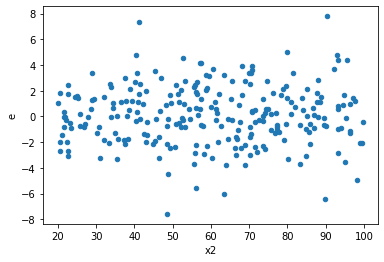

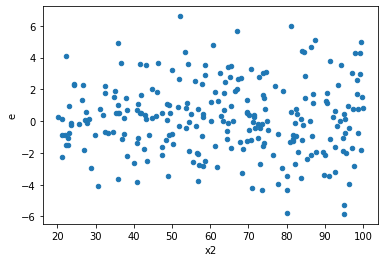

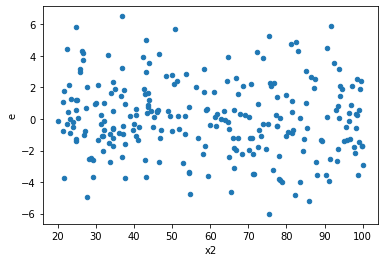

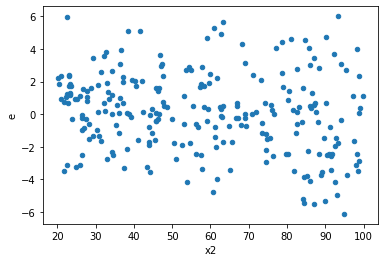

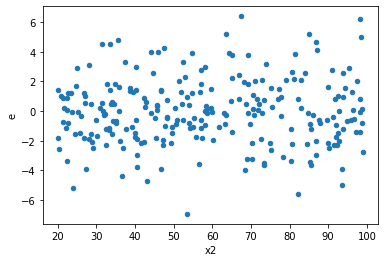

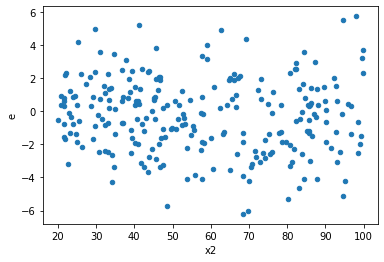

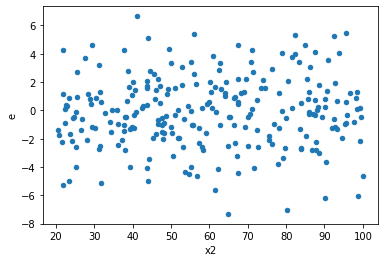

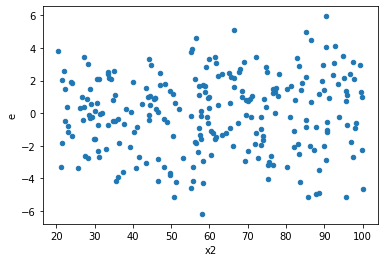

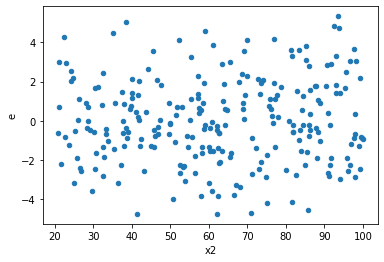

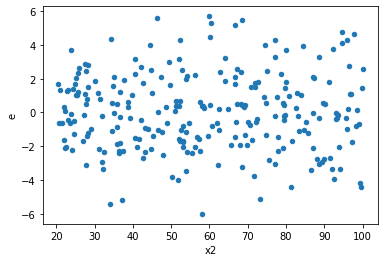

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,128.0,116.0,522.8412967610245,696.9915043280495,4.084697630945504,6.008547451103874,1.4709895306774636,0.03500026297160641,0.9824998685141968,0.017500131485803205,Reject005=0 : Heteroscedasticity
3.0,131.0,113.0,632.9934381250022,602.658097083692,4.832010978053452,5.333257496315859,1.1037345570072217,0.5910955384837302,0.7044522307581349,0.2955477692418651,Reject005=1 : Homoscedasticity
6.0,116.0,128.0,585.5343832231604,696.8416611947996,5.047710200199658,5.444075478084372,1.078523778538046,0.6749957389196819,0.662502130540159,0.33749786945984095,Reject005=1 : Homoscedasticity
7.0,99.0,145.0,426.6961967836245,829.3320558250529,4.310062593773985,5.719531419483123,1.327018180140854,0.1201513017724245,0.9399243491137877,0.06007565088621225,Reject005=1 : Homoscedasticity
8.0,120.0,124.0,629.6475844559938,690.2079971324251,5.247063203799948,5.566193525261493,1.0608207504019447,0.7441342619676954,0.6279328690161523,0.3720671309838477,Reject005=1 : Homoscedasticity
10.0,135.0,109.0,667.1342512095241,563.9657713192844,4.941735194144623,5.1739979020117834,1.047000233469079,0.8064588351585726,0.5967705824207137,0.4032294175792863,Reject005=1 : Homoscedasticity
13.0,131.0,113.0,591.649955665403,798.5466456350151,4.51641187530842,7.066784474646152,1.5646899950114868,0.014981195761401667,0.9925094021192992,0.007490597880700833,Reject005=0 : Heteroscedasticity
19.0,125.0,119.0,610.2196209403521,653.0805883065174,4.881756967522817,5.488072170643003,1.1242002023357285,0.5201899047800946,0.7399050476099527,0.2600949523900473,Reject005=1 : Homoscedasticity
20.0,114.0,130.0,548.4746507630363,722.8184440793651,4.811181147044178,5.560141877533578,1.1556708649287786,0.4233888124503564,0.7883055937748218,0.2116944062251782,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,128.0,116.0,522.8412967610245,696.9915043280495,4.084697630945504,6.008547451103874,1.4709895306774636,0.03500026297160641,Reject005=0 : Heteroscedasticity
1.0,117.0,127.0,717.6371800759057,649.7135780570403,6.133651111759877,5.1158549453310265,0.834063570313372,0.3198430144390579,Reject005=1 : Homoscedasticity
2.0,132.0,112.0,766.5603763312894,577.9818155783445,5.807275578267344,5.160551924806647,0.888635618416157,0.5128845980371789,Reject005=1 : Homoscedasticity
3.0,131.0,113.0,632.9934381250022,602.658097083692,4.832010978053452,5.333257496315859,1.1037345570072217,0.5910955384837302,Reject005=1 : Homoscedasticity
4.0,136.0,108.0,788.1893369651839,602.9504398594257,5.795509830626352,5.582874443142831,0.9633103223533761,0.832285498608594,Reject005=1 : Homoscedasticity
5.0,124.0,120.0,777.296251405686,466.1995561520989,6.268518156497468,3.884996301267491,0.6197631089638945,0.008579260821274779,Reject005=0 : Heteroscedasticity
6.0,116.0,128.0,585.5343832231604,696.8416611947996,5.047710200199658,5.444075478084372,1.078523778538046,0.6749957389196819,Reject005=1 : Homoscedasticity
7.0,99.0,145.0,426.6961967836245,829.3320558250529,4.310062593773985,5.719531419483123,1.327018180140854,0.1201513017724245,Reject005=1 : Homoscedasticity
8.0,120.0,124.0,629.6475844559938,690.2079971324251,5.247063203799948,5.566193525261493,1.0608207504019447,0.7441342619676954,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      838
Reject005=0 : Heteroscedasticity    162
Name: Result_test, dtype: int64